In [123]:
print("iminuit")

iminuit


###exploring iminuit

In [124]:
!pip install iminuit

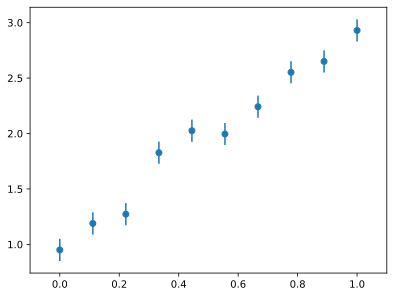

In [125]:
def line(x, a, b):
    return a + x * b

a_true = 1.0
b_true = 2.0

x = np.linspace(0, 1, 10)

z = np.array([-0.49783783, -0.33041722, -1.71800806,  1.60229399,
                 1.36682387, -1.15424221, -0.91425267, -0.03395604,
                 -1.27611719, -0.7004073 ])

sigma_y = 0.1 * np.ones_like(x)
y = line(x, a_true, b_true) + sigma_y * z

plt.errorbar(x, y, sigma_y, fmt="o")
plt.xlim(-0.1, 1.1);



In [126]:
def LSQ(a, b):
    return np.sum((y - line(x, a, b)) ** 2 / sigma_y ** 2)

In [127]:
m = Minuit(LSQ, a=5, b=5)

In [128]:
m.values

<ValueView a=5.0 b=5.0>

In [129]:
m.errors, m.fval, m.nfcn , m.grad , m.fmin, m.init_params,

(<ErrorView a=0.05 b=0.05>,
 None,
 0,
 <bound method PyCapsule.gradient of <iminuit._core.FCN object at 0x7920cc4dbf70>>,
 None,
 ┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.00    │   0.05    │            │            │         │         │       │
│ 1 │ b    │   5.00    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘)

In [130]:
m.nfcn

0

In [131]:
m.LEAST_SQUARES

1.0

##docs

In [165]:
%config InlineBackend.figure_formats = ['svg']
from matplotlib import pyplot as plt
import numpy as np

from iminuit import Minuit

from iminuit.cost import LeastSquares

import iminuit

print("iminuit version:", iminuit.__version__)

iminuit version: 2.30.1


In [166]:
def line(x, α, β):  #model function
    return α + x * β


rng = np.random.default_rng(1)
data_x = np.linspace(0, 1, 10)
data_yerr = 0.1  # could also be an array, params
data_y = rng.normal(line(data_x, 1, 2), data_yerr)

In [167]:
least_squares = LeastSquares(data_x, data_y, data_yerr, line)  #objective function

m = Minuit(least_squares, α=0, β=0)  # starting values for α and β

m.migrad()
m.hesse()  #parameter uncertainity

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.959 (χ²/ndof = 0.5)      │              Nfcn = 46               │
│ EDM = 3.65e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │   1.02    │   0.06    │            │            │         │         │       │
│ 1 │ β    │    2.0    │    0.1    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       α       β │
├───┼─────────────────┤
│ α │ 0.00345 -0.0049 │
│ β │ -0.0049 0.00982 │
└───┴─────────────────┘

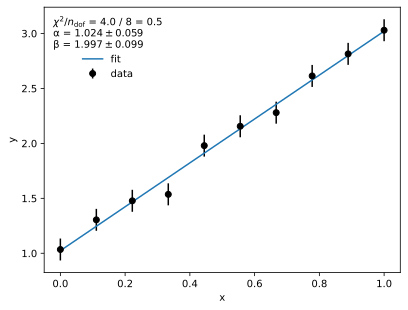

In [168]:
plt.errorbar(data_x, data_y, data_yerr, fmt="ok", label="data")
plt.plot(data_x, line(data_x, *m.values), label="fit")

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=False)
plt.xlabel("x")
plt.ylabel("y");

###initialisation

In [169]:
m = Minuit(least_squares, α=0, β=0)

In [170]:
try:
    Minuit(least_squares, a=0, b=0)
except RuntimeError:
    import traceback

    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-170-9e923092a197>", line 2, in <cell line: 0>
    Minuit(least_squares, a=0, b=0)
  File "/usr/local/lib/python3.11/dist-packages/iminuit/minuit.py", line 683, in __init__
    self._init_state = _make_init_state(self._pos2var, start, kwds)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/iminuit/minuit.py", line 2611, in _make_init_state
    raise RuntimeError(
RuntimeError: a is not one of the parameters [α β]


In [171]:
Minuit(least_squares, α=5, β=5)  # pass starting values for α and β

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,5.00,0.05,,,,,
1,β,5.00,0.05,,,,,


In [139]:
Minuit(least_squares, 5, 5)  # another way of passing starting values for α and β

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,5.00,0.05,,,,,
1,β,5.00,0.05,,,,,


In [140]:
m.fval

In [141]:
m.fcn, m.nfcn

(<iminuit._core.FCN at 0x7920cc5c20b0>, 0)

In [142]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,0.0,0.1,,,,,
1,β,0.0,0.1,,,,,


In [172]:
def line_np(x, par):
    return np.polyval(par, x)

In [173]:
least_squares_np = LeastSquares(data_x, data_y, data_yerr, line_np)

Minuit(least_squares_np, (5, 5))



,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,x0,5.00,0.05,,,,,
1,x1,5.00,0.05,,,,,


In [145]:
Minuit(least_squares_np, (5, 5), name=("a", "b"))

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,5.00,0.05,,,,,
1,b,5.00,0.05,,,,,


In [174]:
Minuit(least_squares_np, (5, 5, 5, 5))



,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,x0,5.00,0.05,,,,,
1,x1,5.00,0.05,,,,,
2,x2,5.00,0.05,,,,,
3,x3,5.00,0.05,,,,,


In [175]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,0.0,0.1,,,,,
1,β,0.0,0.1,,,,,


In [148]:
m.limits = [(0, None), (0, 10)]
m.params



,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,0.0,0.1,,,0,,
1,β,0.0,0.1,,,0,10,


In [176]:
from iminuit.typing import Annotated, Gt

def line_with_positive_slope(x, slope: Annotated[float, Gt(0)], offset):
    return slope * x + offset
lsq = LeastSquares(data_x, data_y, data_yerr, line_with_positive_slope)
Minuit(lsq, 1, 0)

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,slope,1.00,0.01,,,0,,
1,offset,0.0,0.1,,,,,


In [177]:
m.fixed["α"] = True
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,0.0,0.1,,,,,yes
1,β,0.0,0.1,,,,,


In [178]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 307.5 (χ²/ndof = 34.2)     │              Nfcn = 13               │
│ EDM = 5.75e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │    0.0    │    0.1    │            │            │         │         │  yes  │
│ 1 │ β    │   3.45    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       α       β │
├───┼─────────────────┤
│ α │       0  0.0000 │
│ β │  0.0000 0.00284 │
└───┴─────────────────┘

In [179]:
m.fixed[0] = False
m.fixed[1] = True
m.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 219.6 (χ²/ndof = 24.4)     │              Nfcn = 26               │
│ EDM = 6.53e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │   0.296   │   0.032   │            │            │         │         │       │
│ 1 │ β    │   3.45    │   0.05    │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     α     β │
├───┼─────────────┤
│ α │ 0.001  0e-3 │
│ β │  0e-3     0 │
└───┴─────────────┘

In [180]:
m.fixed = False
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.959 (χ²/ndof = 0.5)      │              Nfcn = 57               │
│ EDM = 1.69e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │   1.02    │   0.06    │            │            │         │         │       │
│ 1 │ β    │    2.0    │    0.1    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       α       β │
├───┼─────────────────┤
│ α │ 0.00345 -0.0049 │
│ β │ -0.0049 0.00982 │
└───┴─────────────────┘

In [181]:
m.fixto("α", 3)
m.params



,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,3.00,0.06,,,,,yes
1,β,2.0,0.1,,,,,


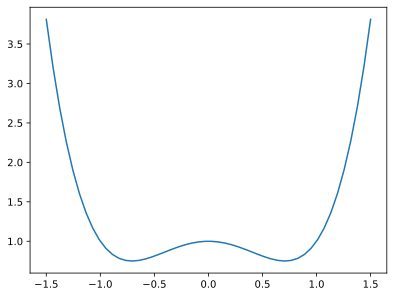

In [182]:
def cost_function_with_two_minima(x):
    return x**4 - x**2 + 1


x = np.linspace(-1.5, 1.5)
plt.plot(x, cost_function_with_two_minima(x));

In [183]:
m = Minuit(cost_function_with_two_minima, x=-0.1)
m.migrad()
print("starting value -0.1, minimum at", m.values["x"])


starting value -0.1, minimum at -0.7085906080341975


In [184]:
m.values["x"] = 0.1
m.migrad()
print("starting value +0.1, minimum at", m.values["x"])

starting value +0.1, minimum at 0.708796091342642


In [156]:
Minuit(cost_function_with_two_minima, x=10).simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.7501                     │              Nfcn = 23               │
│ EDM = 0.0176 (Goal: 0.1)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x    │    0.7    │    0.8    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [157]:
Minuit(cost_function_with_two_minima, x=10).simplex()  #look into this

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.7501                     │              Nfcn = 23               │
│ EDM = 0.0176 (Goal: 0.1)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x    │    0.7    │    0.8    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [158]:
Minuit(cost_function_with_two_minima, x=10).simplex().migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.75                       │              Nfcn = 36               │
│ EDM = 1.12e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x    │    0.7    │    0.7    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────┐
│   │   x │
├───┼─────┤
│ x │ 0.5 │
└───┴─────┘

In [185]:
m = Minuit(cost_function_with_two_minima, x=10)
m.limits = (-10, 10)
m.scan(ncall=50)

┌─────────────────────────────────────────────────────────────────────────┐
│                                 Scan                                    │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.7657                     │              Nfcn = 55               │
│ EDM = 0.0188 (Goal: 0.1)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x    │   -0.6    │    0.9    │            │            │   -10   │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [186]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.75                       │              Nfcn = 69               │
│ EDM = 1.92e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x    │   -0.7    │    0.7    │            │            │   -10   │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     x │
├───┼───────┤
│ x │ 0.494 │
└───┴───────┘

scan and simplex:

least square minimizes the diff between actual and predicted values by redcing the sum of squared errors.

In [206]:
m = Minuit(least_squares, α=5, β=5)
m.errors = (0.1, 0.2)
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,5.0,0.1,,,,,
1,β,5.0,0.2,,,,,


In [191]:
m.errors = 0.3  # broadcasting
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,5.0,0.3,,,,,
1,β,5.0,0.3,,,,,


In [194]:
m = Minuit(least_squares, α=5, β=5)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.959 (χ²/ndof = 0.5)      │              Nfcn = 30               │
│ EDM = 1.4e-22 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │   1.02    │   0.06    │            │            │         │         │       │
│ 1 │ β    │    2.0    │    0.1    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       α       β │
├───┼─────────────────┤
│ α │ 0.00345 -0.0049 │
│ β │ -0.0049 0.00982 │
└───┴─────────────────┘

In [195]:
m.covariance

┌───┬─────────────────┐
│   │       α       β │
├───┼─────────────────┤
│ α │ 0.00345 -0.0049 │
│ β │ -0.0049 0.00982 │
└───┴─────────────────┘

In [196]:
m.errors = (0.16, 0.2)
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,1.02,0.16,,,,,
1,β,2.0,0.2,,,,,


In [198]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                               External                                  │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.959 (χ²/ndof = 0.5)      │              Nfcn = 63               │
│ EDM = 6.49e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │   1.02    │   0.06    │            │            │         │         │       │
│ 1 │ β    │    2.0    │    0.1    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       α       β │
├───┼─────────────────┤
│ α │ 0.00345 -0.0049 │
│ β │ -0.0049 0.00982 │
└───┴─────────────────┘

In [200]:
print(repr(m.covariance))

[[ 0.0034552  -0.00491024]
 [-0.00491024  0.00982017]]


In [199]:
m.hesse().params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,1.02,0.06,,,,,
1,β,2.0,0.1,,,,,


In [201]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                               External                                  │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.959 (χ²/ndof = 0.5)      │              Nfcn = 105              │
│ EDM = 6.49e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │   1.02    │   0.06    │   -0.06    │    0.06    │         │         │       │
│ 1 │ β    │    2.0    │    0.1    │    -0.1    │    0.1     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           α           │           β           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.06   │   0.06    │   -0.1    │    0.1    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────┐
│   │       α       β │
├───┼─────────────────┤
│ α │ 0.00346 -0.0049 │
│ β │ -0.0049 0.00982 │
└───┴─────────────────┘

In [202]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,1.02,0.06,-0.06,0.06,,,
1,β,2.0,0.1,-0.1,0.1,,,


In [203]:
m.values

<ValueView α=1.0240435955962377 β=1.996894456425372>

In [204]:
m.merrors

┌──────────┬───────────────────────┬───────────────────────┐
│          │           α           │           β           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.06   │   0.06    │   -0.1    │    0.1    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘

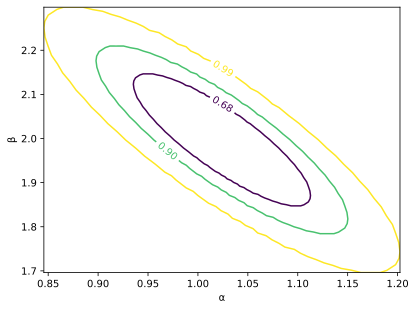

In [209]:
m.draw_mncontour("α", "β", cl=(0.68, 0.9, 0.99));

## passing grad to migrad

In [217]:
import numpy as np
from iminuit import Minuit

def cost_function(x, a, b, c):
    return a * x**2 + b * x + c

np.random.seed(0)
x_data = np.linspace(-5, 5, 20)
true_a, true_b, true_c = 1.5, -2.0, 3.0
y_data = cost_function(x_data, true_a, true_b, true_c) + np.random.normal(0, 5, 20)

def cost_for_minuit(a, b, c):
    return np.sum((cost_function(x_data, a, b, c) - y_data) ** 2)

m = Minuit(cost_for_minuit, a=0, b=0, c=0)

m.migrad()

print(m)



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 300.4                      │              Nfcn = 53               │
│ EDM = 6.25e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

In [218]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,1.533,0.027,,,,,
1,b,-2.57,0.07,,,,,
2,c,5.54,0.34,,,,,


In [219]:
def cost_function(x, a, b, c):
    return a * x**2 + b * x + c

def gradient_function(x, a, b, c):
    da = x**2
    db = x
    dc = 1
    # return np.array([da, db, dc])
    return da, db, dc

def cost_for_minuit(a, b, c):
    return np.sum((cost_function(x_data, a, b, c) - y_data) ** 2)

def gradient_for_minuit(a, b, c):
    residuals = cost_function(x_data, a, b, c) - y_data
    grad_a = np.sum(2 * residuals * gradient_function(x_data, a, b, c)[0])
    grad_b = np.sum(2 * residuals * gradient_function(x_data, a, b, c)[1])
    grad_c = np.sum(2 * residuals * gradient_function(x_data, a, b, c)[2])
    return grad_a, grad_b, grad_c

m = Minuit(cost_for_minuit, grad=gradient_for_minuit, a=0, b=0, c=0)

m.migrad()

print(m)

print(f"True values: a={true_a}, b={true_b}, c={true_c}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 300.4                      │         Nfcn = 47, Ngrad = 3         │
│ EDM = 1.05e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────